In [ ]:
import sys
!{sys.executable} -m pip install mycolorpy

In [1]:
from models import Entity, Environment
from vizuals import plot_env_history

import numpy as np
import torch
import torch.utils.data as Data
import matplotlib.pyplot as plt
import time

from random import uniform

SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

TRAIN_SIZE = 200
LIMS = (-1, 1)
VAL_LIMS = (-1.5, 1.5)

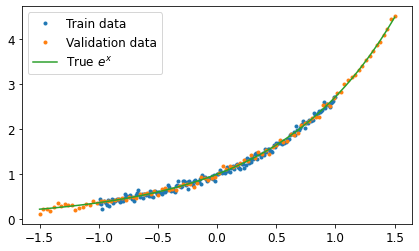

In [3]:
x_arr = torch.linspace(*LIMS, TRAIN_SIZE)
y_arr = torch.exp(x_arr) + torch.normal(0, 0.05, size=(TRAIN_SIZE,))
dataset = Data.TensorDataset(x_arr.unsqueeze(1), y_arr.unsqueeze(1))
train_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=10, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

x_val = torch.linspace(*VAL_LIMS, 100)
y_val = torch.exp(x_val) + torch.normal(0, 0.05, size=(100,))
dataset = Data.TensorDataset(x_val.unsqueeze(1), y_val.unsqueeze(1))
val_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=5, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

true_y = torch.exp(x_val)
dataset = Data.TensorDataset(x_val.unsqueeze(1), true_y.unsqueeze(1))
test_loader = Data.DataLoader(
	dataset=dataset,
    batch_size=1, # Divided into batches
    shuffle=True  # Whether to disrupt the data, the default is False
)

plt.rcParams["figure.figsize"] = (7,4)
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=3, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=3, label="Validation data")
plt.plot(x_val, true_y, label=f"True $e^x$")
plt.legend()
plt.savefig("exp.png")
plt.show()

In [7]:
env = Environment(15, train_loader, train_epochs=25, validation_loader=val_loader)
start_time = time.time()
env.train_epoch()
print(f"Train ended in {int(time.time() - start_time)} s")
env.validate_entities(val_loader, True)

test_history = []
test_history.append(env.validate_entities(test_loader, False))

cpu
Train ended in 9 s


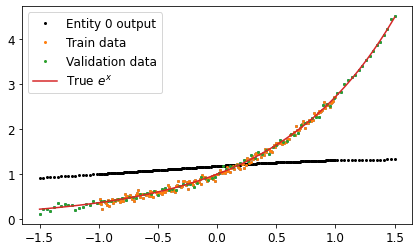

In [8]:
plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[2].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Entity 0 output", marker="o", lw=0, markersize=2, color="black")
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2, label="Validation data")
plt.plot(x_val, true_y, label=f"True $e^x$")
plt.legend()
plt.savefig("Entity_0_output.png", dpi=600)
plt.show()

In [9]:
for i in range(10):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities(val_loader, True)
    test_history.append(env.validate_entities(test_loader, False))
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.012550155588542111 11
0.01984955257968977 14
0.021826094216667116 1
0.03497498007025569 0
0.04842458680272103 10
0.050618794802576306 8
0.0515397920459509 3
0.05169357529841363 4
0.05510090582072735 6
0.055196459740400314 7
0.05530376823386177 12
0.06172368362080306 5


C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\init.py:403: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Evo epoch 1 ended in 10 s
0.013191910415189339 11
0.018085073332767935 11
0.02030215030303225 6
0.02121373183501419 1
0.02159468739235308 1
0.021780053577094803 14
0.032010296202497554 0
0.044574740240350366 14
0.044888313736300915 12
0.04850972102023661 10
0.05000182235613465 8
0.05140025172382593 3
Evo epoch 2 ended in 10 s
0.011155259408988058 11
0.011453930807183496 11
0.013617773342411965 11
0.018778138613561167 11
0.0193890188910882 1
0.023903942209435626 6
0.028352787678595632 0
0.029774322863668202 14
0.03004879383428488 1
0.033020627296064045 14
0.04454010214656591 6
0.05106125615537167 3
Evo epoch 3 ended in 10 s
0.0102765398734482 11
0.011215955110092182 11
0.012479080350603907 11
0.012637797441566363 11
0.01655952943547163 6
0.018929313586559145 1
0.020734223168110473 11
0.020979322678758763 11
0.022353571424027906 11
0.025336801251396535 14
0.02758578428067267 6
0.05493821710348129 14
Evo epoch 4 ended in 11 s
0.01026783004635945 11
0.0106181738874875 11
0.0122763907210901

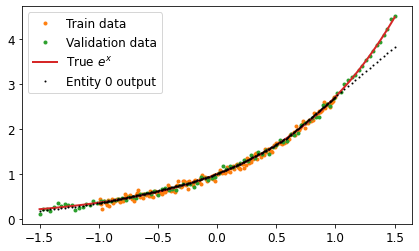

In [13]:
plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[0].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=3, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=3, label="Validation data")
plt.plot(x_val, true_y, label=f"True $e^x$", lw=2)
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Entity 0 output", marker="o", lw=0, markersize=1, color="black")
plt.legend()
plt.savefig("Entity_0_trained_output.png", dpi=300)
plt.show()

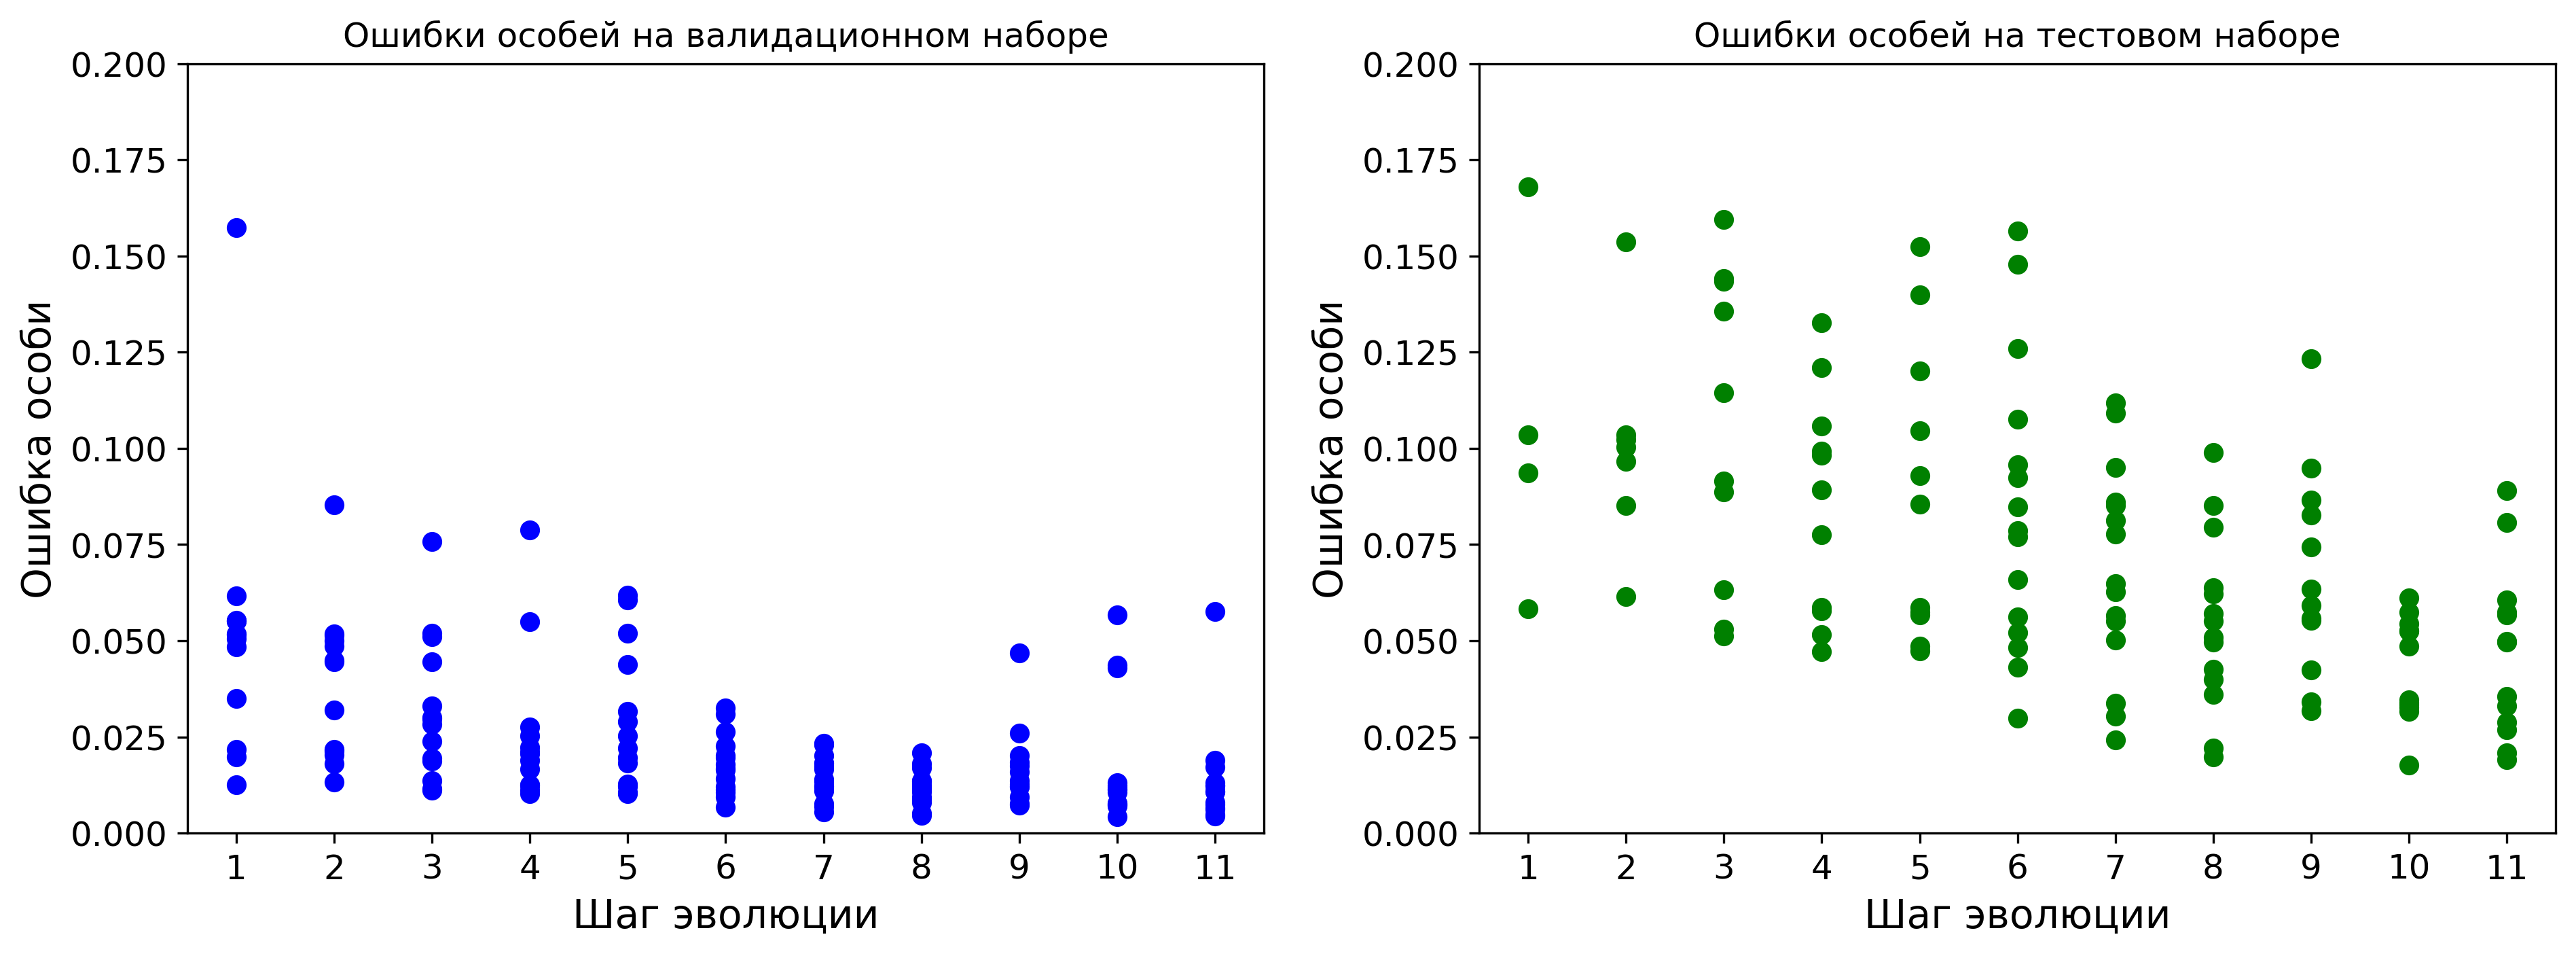

In [15]:
fig, axes = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

ax1, ax2 = axes

ax1.set_title("Ошибки особей на валидационном наборе")
ax1.set_xlabel("Шаг эволюции")
ax1.set_ylabel("Ошибка особи")
ax1.set_ylim((0, 0.2))
for i, arr in enumerate(env.history):
    for loss in arr:
        ax1.scatter(i+1, loss, color="blue")
ax1.set_xticks(list(range(1, len(env.history)+1)))

ax2.set_title("Ошибки особей на тестовом наборе")
ax2.set_xlabel("Шаг эволюции")
ax2.set_ylabel("Ошибка особи")
ax2.set_ylim((0, 0.2))
for i, arr in enumerate(test_history):
    for loss in arr:
        ax2.scatter(i+1, loss, color="green")
ax2.set_xticks(list(range(1, len(env.history)+1)))
plt.savefig("loss(evo_epoch).png", edgecolor='black', dpi=300, facecolor='white')
plt.show()

In [16]:
for i in range(10):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities(val_loader, True)
    test_history.append(env.validate_entities(test_loader, False))
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.004486482522333972 11
0.004837313229218125 11
0.006178783816285431 11
0.006515949154854752 11
0.007396922785555944 11
0.007907697480404749 11
0.010794593140599319 11
0.010874220400582998 11
0.012332965835230424 11
0.012455043131485582 11
0.013053968769963831 11
0.01717723618494347 11
Evo epoch 1 ended in 11 s
0.003253026998863788 11
0.004614243468968197 11
0.005236636702902616 11
0.005282742229173891 11
0.0065013167879078545 11
0.006547113956185058 11
0.007083786718430929 11
0.008716140079777687 11
0.013245158784557134 11
0.017340133285033515 11
0.020103075188817456 11
0.03707115469500423 11
Evo epoch 2 ended in 11 s
0.0063361900066956885 11
0.006354607646353543 11
0.006996331771370023 11
0.0070418006798718125 11
0.0071855793654685834 11
0.007424283961299807 11
0.008660760733182542 11
0.010127645911998115 11
0.010915854568593205 11
0.014287640244001523 11
0.01712499244546052 11
0.03036840205284534 11
Evo epoch 3 ended in 11 s
0.005309063143213279 11
0.005828981806407682 11
0.00600414

C:\Users\mrsca\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\init.py:403: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


Evo epoch 8 ended in 11 s
0.0026763399178162217 11
0.004383105323358905 11
0.004509208541130647 11
0.00575570416636765 11
0.006459184326231479 11
0.006977737286943011 11
0.007719831885769963 11
0.0107180230866652 11
0.015199371868511663 11
0.015820676687872036 11
0.04089116368442774 11
0.04562724811024964 11
Evo epoch 9 ended in 11 s
0.003277319155749865 11
0.004661299387225881 11
0.005050205032166559 11
0.005261943774530664 11
0.005496207292308099 11
0.005724440333433449 11
0.007581847035326064 11
0.008443989008665085 11
0.008666327461833134 11
0.013023654948628973 11
0.014583557662554087 11
0.04894400091841817 11
Evo epoch 10 ended in 11 s


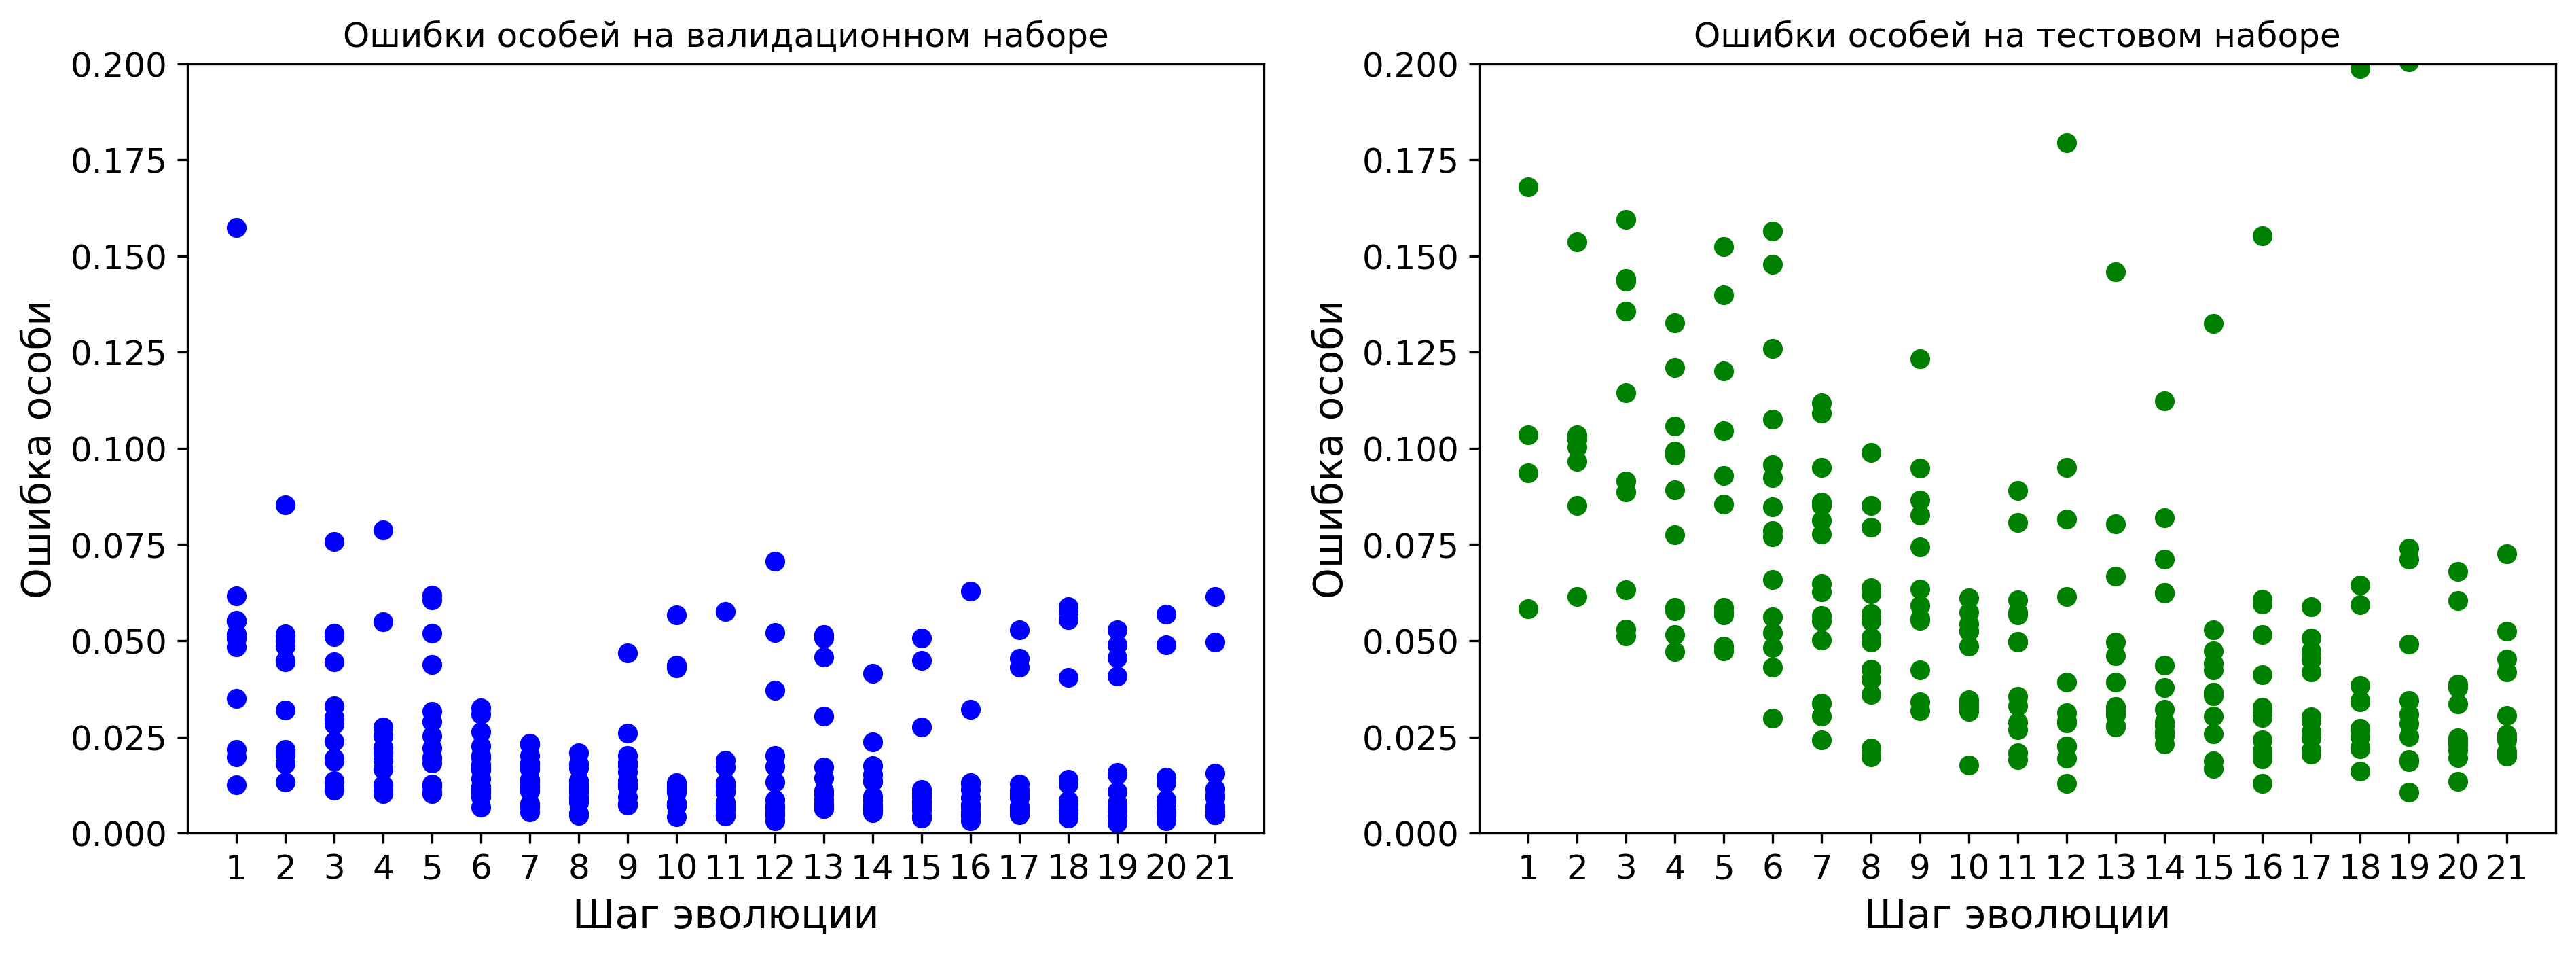

In [17]:
fig, axes = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

ax1, ax2 = axes

ax1.set_title("Ошибки особей на валидационном наборе")
ax1.set_xlabel("Шаг эволюции")
ax1.set_ylabel("Ошибка особи")
ax1.set_ylim((0, 0.2))
for i, arr in enumerate(env.history):
    for loss in arr:
        ax1.scatter(i+1, loss, color="blue")
ax1.set_xticks(list(range(1, len(env.history)+1, 5)))

ax2.set_title("Ошибки особей на тестовом наборе")
ax2.set_xlabel("Шаг эволюции")
ax2.set_ylabel("Ошибка особи")
ax2.set_ylim((0, 0.2))
for i, arr in enumerate(test_history):
    for loss in arr:
        ax2.scatter(i+1, loss, color="green")
ax2.set_xticks(list(range(1, len(env.history)+1, 5)))
plt.savefig("loss(evo_epoch)_30.png", edgecolor='black', dpi=300, facecolor='white')
plt.show()

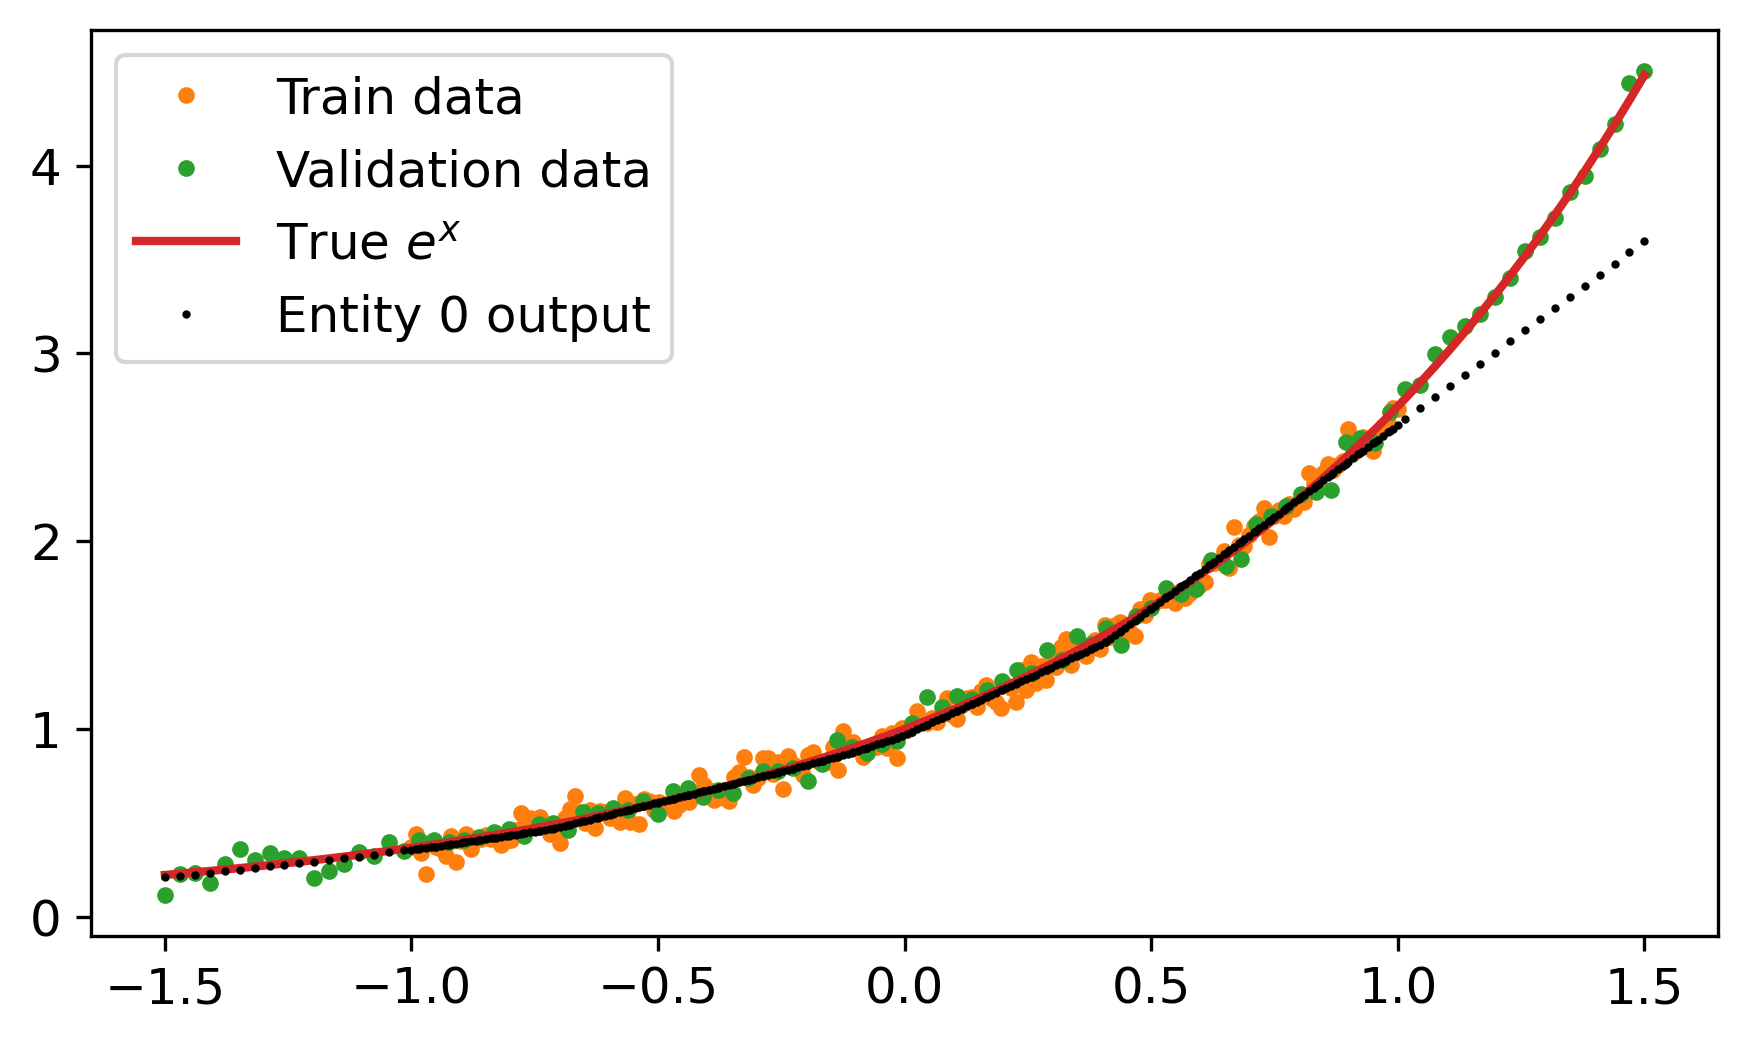

In [20]:
plt.rcParams["figure.figsize"] = (7,4)

plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[4].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=3, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=3, label="Validation data")
plt.plot(x_val, true_y, label=f"True $e^x$", lw=2)
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Entity 0 output", marker="o", lw=0, markersize=1, color="black")

plt.legend()
plt.savefig("Entity_0_trained_30_output.png", dpi=300)
plt.show()

In [21]:
for i in range(10):
    start_time = time.time()
    env.evo_step()
    env.train_epoch()
    env.validate_entities(val_loader, True)
    test_history.append(env.validate_entities(test_loader, False))
    print(f"Evo epoch {i+1} ended in {int(time.time() - start_time)} s")

0.004739626102964393 11
0.004762061635265127 11
0.004801922608166933 11
0.0049370686610927805 11
0.005562547519803047 11
0.005758619714761153 11
0.005831755113322288 11
0.006957979175494984 11
0.009268479822203517 11
0.009965782917861361 11
0.01143931599217467 11
0.015495513050118462 11
Evo epoch 1 ended in 12 s
0.0037798935920000075 11
0.004202908520819619 11
0.004466566560731735 11
0.004754747781553306 11
0.005287081167334691 11
0.006443929048255086 11
0.007088465467095376 11
0.0072447415236092634 11
0.008176569022471086 11
0.00856773197388975 11
0.008586313527775929 11
0.012020785372005776 11
Evo epoch 2 ended in 12 s
0.004101928268501069 11
0.0045889600913506 11
0.00603941770590609 11
0.0062409359632147245 11
0.006281200554512907 11
0.0065139092376921325 11
0.006521180403651669 11
0.008034784281626343 11
0.008229719192022459 11
0.009173892043763772 11
0.009436942210886628 11
0.00997087025665678 11
Evo epoch 3 ended in 13 s
0.00504210984625388 11
0.005043394864769653 11
0.0054308667

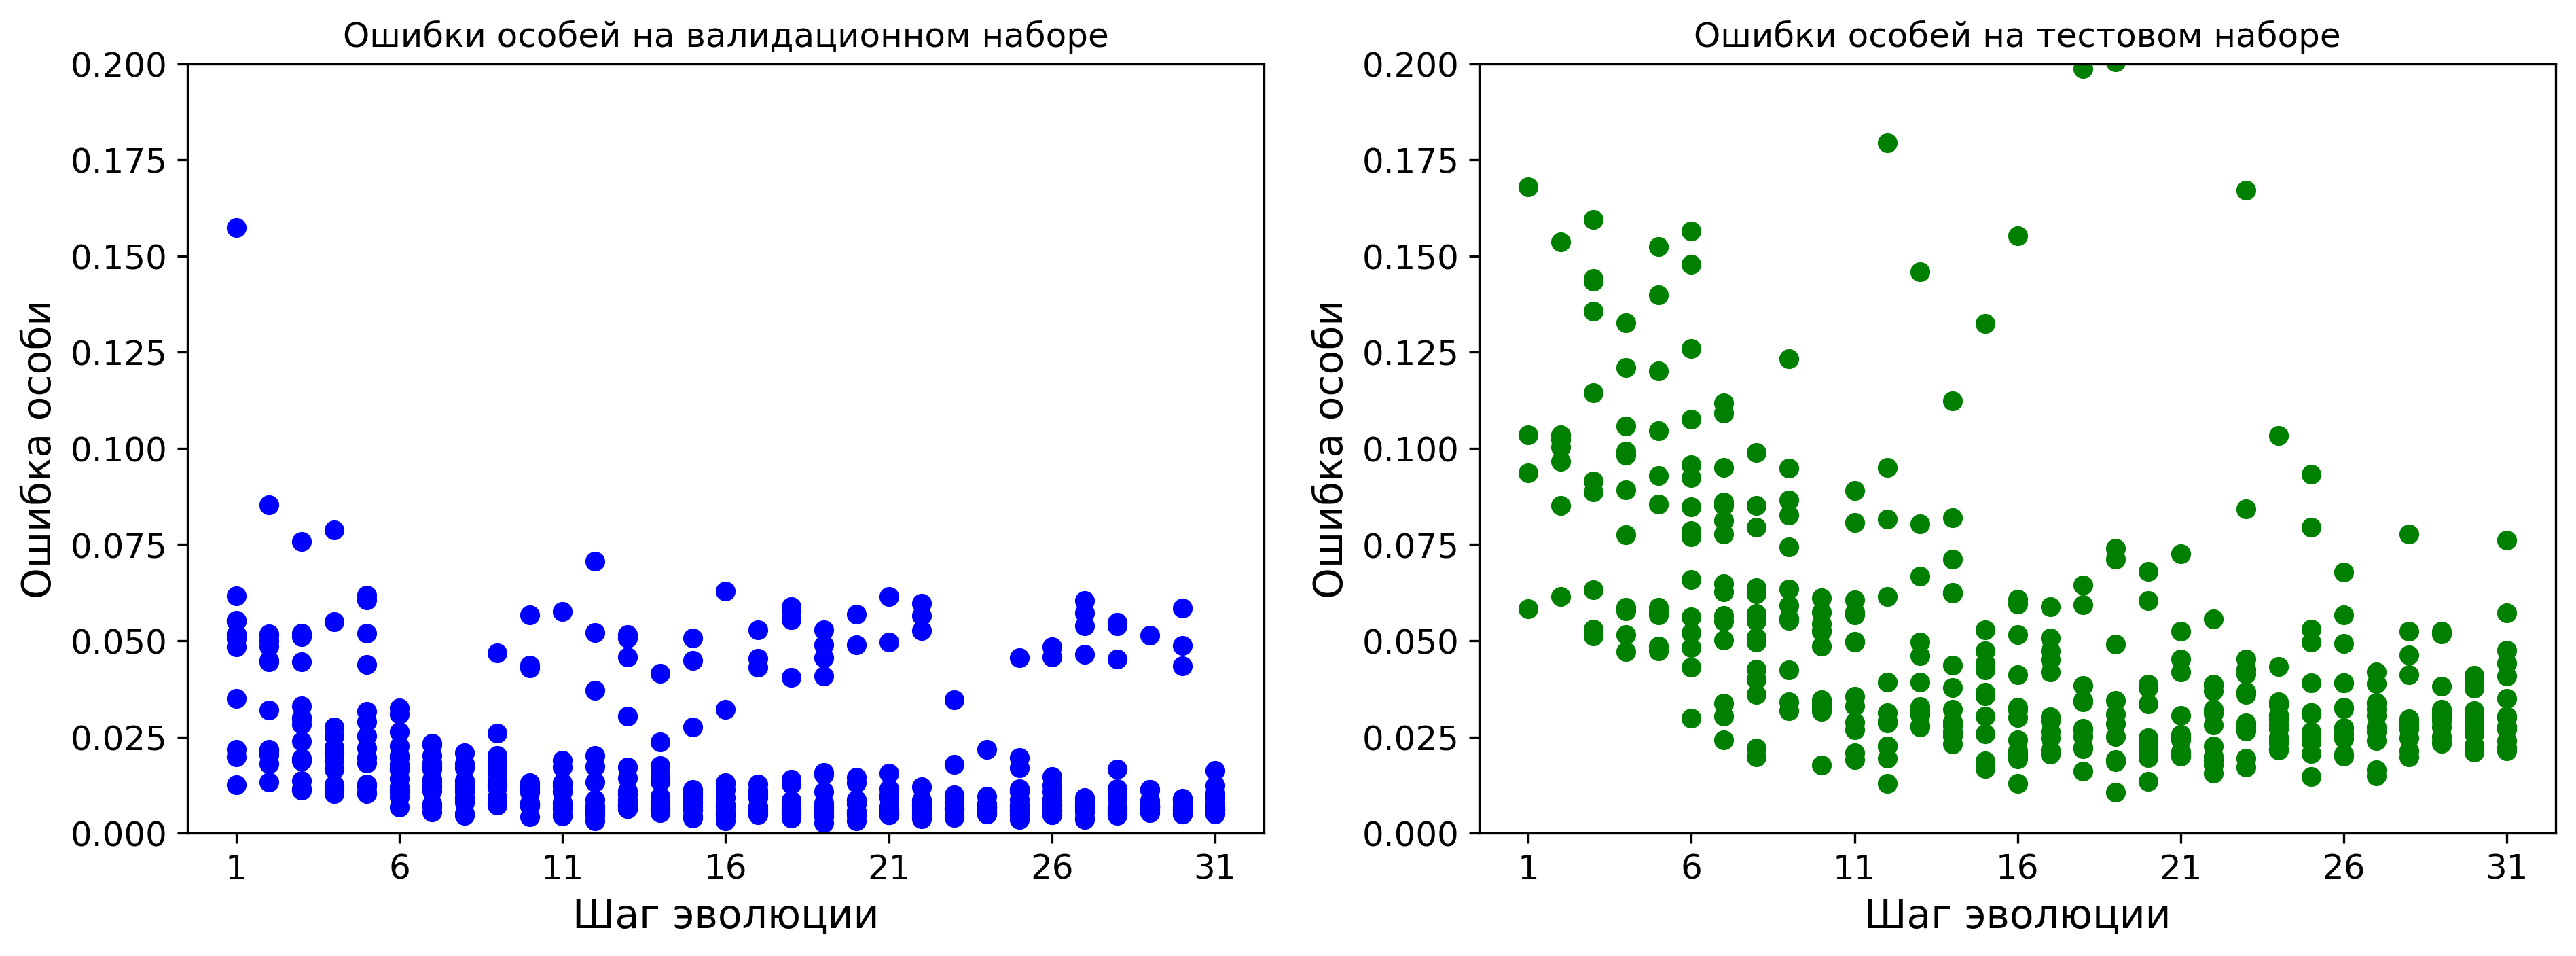

In [22]:
fig, axes = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

ax1, ax2 = axes

ax1.set_title("Ошибки особей на валидационном наборе")
ax1.set_xlabel("Шаг эволюции")
ax1.set_ylabel("Ошибка особи")
ax1.set_ylim((0, 0.2))
for i, arr in enumerate(env.history):
    for loss in arr:
        ax1.scatter(i+1, loss, color="blue")
ax1.set_xticks(list(range(1, len(env.history)+1, 5)))

ax2.set_title("Ошибки особей на тестовом наборе")
ax2.set_xlabel("Шаг эволюции")
ax2.set_ylabel("Ошибка особи")
ax2.set_ylim((0, 0.2))
for i, arr in enumerate(test_history):
    for loss in arr:
        ax2.scatter(i+1, loss, color="green")
ax2.set_xticks(list(range(1, len(env.history)+1, 5)))
plt.savefig("loss(evo_epoch)_30.png", edgecolor='black', dpi=600, facecolor='white')
plt.show()

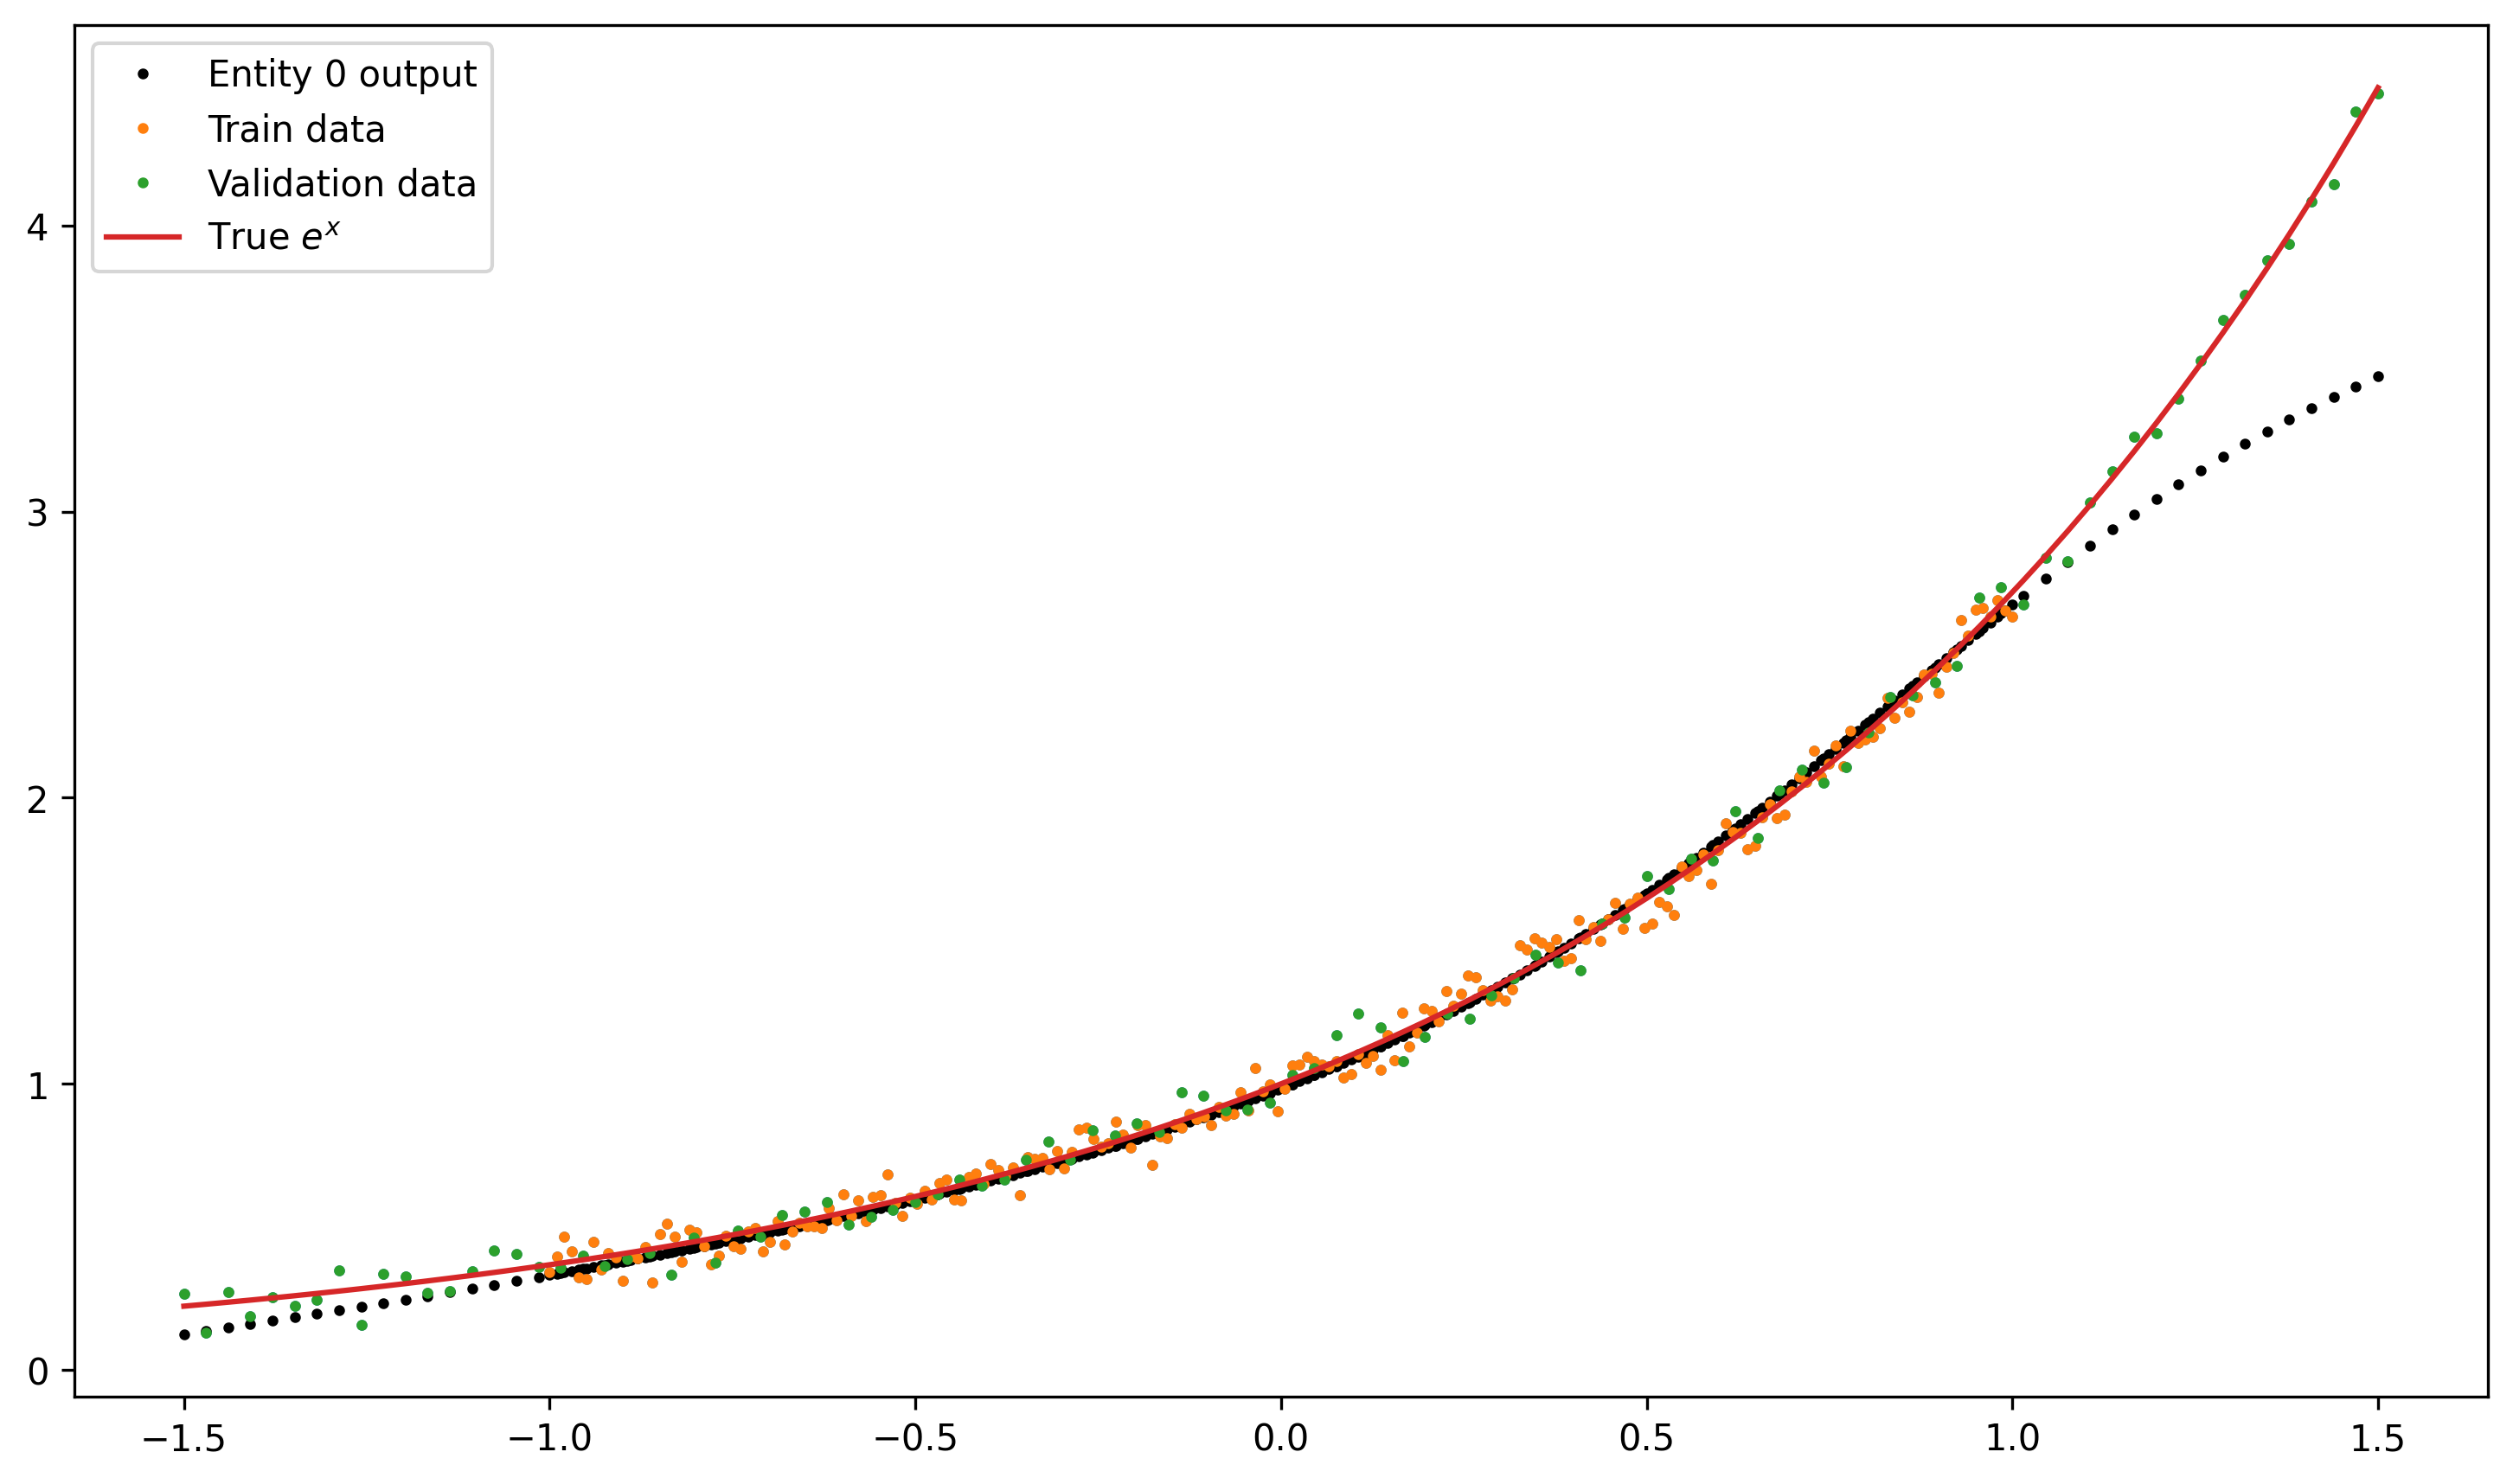

In [33]:
plt.plot(torch.cat((x_arr, x_val)), torch.cat((y_arr, y_val)), marker="o", lw=0, markersize=2)
y_p = env.entities[4].predict(torch.cat((x_arr, x_val)).unsqueeze(1))
plt.plot(torch.cat((x_arr, x_val)), y_p.squeeze(1), label="Entity 0 output", marker="o", lw=0, markersize=2, color="black")
plt.plot(x_arr, y_arr, marker="o", lw=0, markersize=2, label="Train data")
plt.plot(x_val, y_val, marker="o", lw=0, markersize=2, label="Validation data")
plt.plot(x_val, true_y, label=f"True $e^x$")
plt.savefig("Entity_0_trained_30_output.png", dpi=600)
plt.legend()
plt.show()